In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

In [51]:
amd=pd.read_csv("C:/Users/ELCOT/Downloads/imports-85.data",names=["symboling","normalized_losses","make","fuel_type","aspiration","numofdoors","bodystyle","drive_wheels","engine_location","wheelbase","length","width","height","curb_weight","engine_type","numof_cylinders","enginesize","fuelsystem","bore","stroke","compression_ratio","horsepower","peakrpm","city_mpg","highway_mpg","price"],na_values="?")

In [52]:
amd.head()

,symboling,normalized_losses,make,fuel_type,aspiration,numofdoors,bodystyle,drive_wheels,engine_location,wheelbase,...,enginesize,fuelsystem,bore,stroke,compression_ratio,horsepower,peakrpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [46]:
amd.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'numofdoors', 'bodystyle', 'drive_wheels', 'engine_location',
       'wheelbase', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'numof_cylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peakrpm', 'city_mpg', 'highway_mpg',
       'price'],
      dtype='object')

In [47]:
amd.shape

(205, 26)

In [48]:
amd.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,numofdoors,bodystyle,drive_wheels,engine_location,wheelbase,...,enginesize,fuelsystem,bore,stroke,compression_ratio,horsepower,peakrpm,city_mpg,highway_mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


# ---------------   EDA    ---------------

In [49]:
amd.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
numofdoors            2
bodystyle             0
drive_wheels          0
engine_location       0
wheelbase             0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
numof_cylinders       0
enginesize            0
fuelsystem            0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peakrpm               2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [50]:
amd.describe()

,symboling,normalized_losses,wheelbase,length,width,height,curb_weight,enginesize,bore,stroke,compression_ratio,horsepower,peakrpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


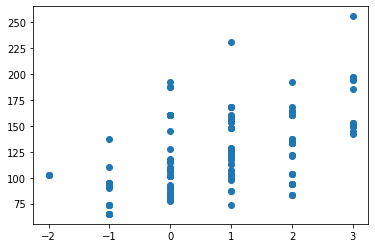

In [57]:
plt.scatter(amd.symboling,amd.normalized_losses)

(array([17., 46., 31., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

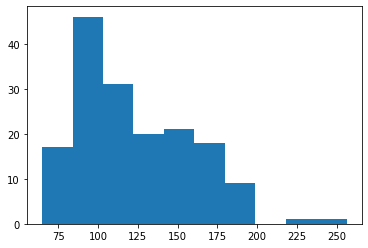

In [58]:
plt.hist(amd.normalized_losses)

In [59]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   numofdoors         203 non-null    object 
 6   bodystyle          205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  numof_cylinders    205 non-null    object 
 16  enginesize         205 non

In [61]:
amd.normalized_losses.unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [53]:
amd.normalized_losses.fillna(amd.normalized_losses.mean(),inplace=True)

In [66]:
amd.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
numofdoors           2
bodystyle            0
drive_wheels         0
engine_location      0
wheelbase            0
length               0
width                0
height               0
curb_weight          0
engine_type          0
numof_cylinders      0
enginesize           0
fuelsystem           0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peakrpm              2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

#### clearing the null values

In [54]:
amd.numofdoors.fillna(amd.normalized_losses.mean(),inplace=True)

In [55]:
amd.bore.fillna(amd.bore.mean(),inplace=True)

In [56]:
amd.stroke.fillna(amd.stroke.mean(),inplace=True)

In [57]:
amd.horsepower.fillna(amd.horsepower.mean(),inplace=True)

In [58]:
amd.peakrpm.fillna(amd.peakrpm.mean(),inplace=True)


In [59]:
amd.price.fillna(amd.price.mean(),inplace=True)

In [14]:
amd.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
numofdoors           0
bodystyle            0
drive_wheels         0
engine_location      0
wheelbase            0
length               0
width                0
height               0
curb_weight          0
engine_type          0
numof_cylinders      0
enginesize           0
fuelsystem           0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peakrpm              0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [15]:
stats.shapiro(amd.symboling)

ShapiroResult(statistic=0.9170166254043579, pvalue=2.519247477295039e-09)

In [14]:
stats.shapiro(amd.normalized_losses)

ShapiroResult(statistic=0.9490930438041687, pvalue=1.1780501836256008e-06)

{'whiskers': [<matplotlib.lines.Line2D at 0x238e7e02be0>,
 'caps': [<matplotlib.lines.Line2D at 0x238e7e20160>,
 'boxes': [<matplotlib.lines.Line2D at 0x238e7e02790>],
 'medians': [<matplotlib.lines.Line2D at 0x238e7e20880>],
 'fliers': [<matplotlib.lines.Line2D at 0x238e7e20c10>],
 'means': []}

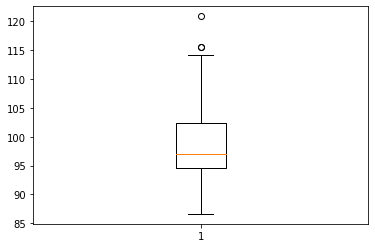

In [18]:
plt.boxplot(amd.wheelbase)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheelbase', ylabel='count'>

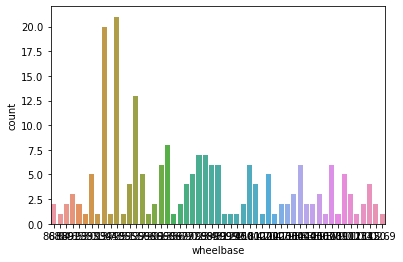

In [20]:
sns.countplot(amd.wheelbase,data=amd)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

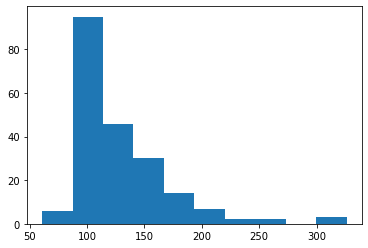

In [21]:
plt.hist(amd.enginesize)

In [22]:
stats.shapiro(amd.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

{'whiskers': [<matplotlib.lines.Line2D at 0x238ec78e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x238ec78ea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x238ec77ff10>],
 'medians': [<matplotlib.lines.Line2D at 0x238ec79c160>],
 'fliers': [<matplotlib.lines.Line2D at 0x238ec79c4f0>],
 'means': []}

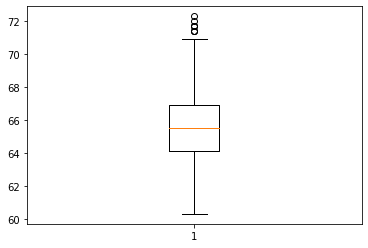

In [23]:
plt.boxplot(amd.width)

(array([81., 45., 39., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

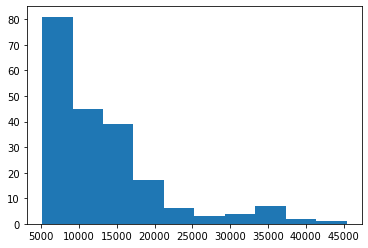

In [24]:
plt.hist(amd.price)

<AxesSubplot:xlabel='engine_location', ylabel='count'>

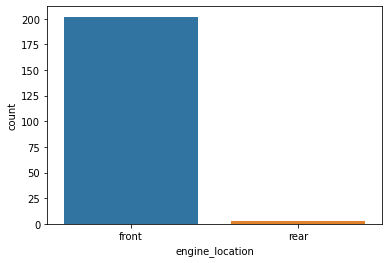

In [15]:
sns.countplot(x=amd.engine_location,data=amd)

<AxesSubplot:xlabel='enginesize', ylabel='count'>

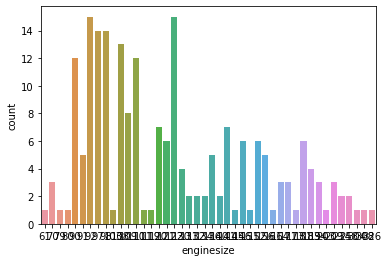

In [16]:
sns.countplot(x=amd.enginesize,data=amd)

In [60]:
amd.symboling=amd.symboling.replace(-1,'-ve_symboling')
amd.symboling=amd.symboling.replace(-2,'-ve_symboling')

In [61]:
amd.symboling=amd.symboling.replace(2,'+ve_symboling')
amd.symboling=amd.symboling.replace(1,'+ve_symboling')
amd.symboling=amd.symboling.replace(-1,'+ve_symboling')

<AxesSubplot:xlabel='symboling', ylabel='count'>

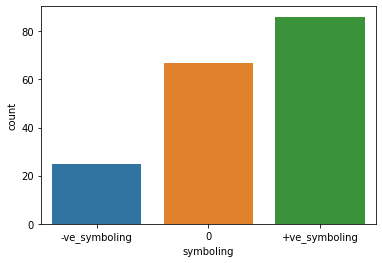

In [62]:
sns.countplot(x=amd.symboling,order=['-ve_symboling',0,'+ve_symboling'])

### hypothesis testing

In [63]:
stats.f_oneway(amd.price[amd.symboling=='-ve_symboling'],amd.price[amd.symboling==0],amd.price[amd.symboling=='+ve_symboling'])

F_onewayResult(statistic=12.973625678158129, pvalue=5.573758225507249e-06)

In [64]:
stats.f_oneway(amd.horsepower [amd.symboling=='-ve_symboling'],amd.horsepower[amd.symboling==0],amd.horsepower[amd.symboling=='+ve_symboling'])

F_onewayResult(statistic=6.699357646635441, pvalue=0.001572207177595987)

In [65]:
stats.f_oneway(amd.city_mpg[amd.symboling=='-ve_symboling'],amd.city_mpg[amd.symboling==0],amd.city_mpg[amd.symboling=='+ve_symboling'])

F_onewayResult(statistic=10.270075941021407, pvalue=6.0629473154286664e-05)

# ---- splitting----

In [67]:
trained=amd

In [68]:
train=amd.city_mpg

In [69]:
test=amd.highway_mpg

In [70]:
amd.drop(['city_mpg','highway_mpg'],axis=1,inplace=True)

In [71]:
amd.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'numofdoors', 'bodystyle', 'drive_wheels', 'engine_location',
       'wheelbase', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'numof_cylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peakrpm', 'price'],
      dtype='object')

In [72]:
x=sm.add_constant(amd)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
x

,const,symboling,normalized_losses,make,fuel_type,aspiration,numofdoors,bodystyle,drive_wheels,engine_location,...,engine_type,numof_cylinders,enginesize,fuelsystem,bore,stroke,compression_ratio,horsepower,peakrpm,price
0,1.0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0
1,1.0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0
2,1.0,+ve_symboling,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0
3,1.0,+ve_symboling,164.0,audi,gas,std,four,sedan,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0
4,1.0,+ve_symboling,164.0,audi,gas,std,four,sedan,4wd,front,...,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,-ve_symboling,95.0,volvo,gas,std,four,sedan,rwd,front,...,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,16845.0
201,1.0,-ve_symboling,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19045.0
202,1.0,-ve_symboling,95.0,volvo,gas,std,four,sedan,rwd,front,...,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,21485.0
203,1.0,-ve_symboling,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,22470.0


In [73]:
train_x=x.iloc[:180]

In [74]:
test_x=x.iloc[180:]

In [34]:
test_x

,const,symboling,normalized_losses,make,fuel_type,aspiration,numofdoors,bodystyle,drive_wheels,engine_location,...,engine_type,numof_cylinders,enginesize,fuelsystem,bore,stroke,compression_ratio,horsepower,peakrpm,price
180,1.0,-ve_symboling,90.0,toyota,gas,std,four,sedan,rwd,front,...,dohc,six,171,mpfi,3.27,3.35,9.2,156.0,5200.0,15690.0
181,1.0,-ve_symboling,122.0,toyota,gas,std,four,wagon,rwd,front,...,dohc,six,161,mpfi,3.27,3.35,9.2,156.0,5200.0,15750.0
182,1.0,+ve_symboling,122.0,volkswagen,diesel,std,two,sedan,fwd,front,...,ohc,four,97,idi,3.01,3.40,23.0,52.0,4800.0,7775.0
183,1.0,+ve_symboling,122.0,volkswagen,gas,std,two,sedan,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,9.0,85.0,5250.0,7975.0
184,1.0,+ve_symboling,94.0,volkswagen,diesel,std,four,sedan,fwd,front,...,ohc,four,97,idi,3.01,3.40,23.0,52.0,4800.0,7995.0
185,1.0,+ve_symboling,94.0,volkswagen,gas,std,four,sedan,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,9.0,85.0,5250.0,8195.0
186,1.0,+ve_symboling,94.0,volkswagen,gas,std,four,sedan,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,9.0,85.0,5250.0,8495.0
187,1.0,+ve_symboling,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,...,ohc,four,97,idi,3.01,3.40,23.0,68.0,4500.0,9495.0
188,1.0,+ve_symboling,94.0,volkswagen,gas,std,four,sedan,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,10.0,100.0,5500.0,9995.0
189,1.0,3,122.0,volkswagen,gas,std,two,convertible,fwd,front,...,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,11595.0


In [75]:
amd.drop(["symboling","make","fuel_type","aspiration",'numofdoors','bodystyle','drive_wheels','engine_location','engine_type','numof_cylinders','fuelsystem'],axis=1,inplace=True)

In [76]:
model = sm.OLS(train,trained).fit()

In [77]:
model.params

normalized_losses   -0.002807
wheelbase            0.095319
length              -0.183878
width                0.732172
height               0.377922
curb_weight         -0.009757
enginesize           0.068130
bore                -0.593352
stroke              -0.097192
compression_ratio    0.543443
horsepower          -0.055800
peakrpm              0.000047
price               -0.000134
dtype: float64

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               city_mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1375.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                   1.09e-181
Time:                        11:40:48   Log-Likelihood:                         -493.41
No. Observations:                 205   AIC:                                      1013.
Df Residuals:                     192   BIC:                                      1056.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
normalized_losses    -0.0028      0.007     -0.407      0.685      -0.016       0.011
wheelbase             0.0953      0.084      1.134      0.258      -0.070       0.261
length               -0.1839      0.046     -4.034      0.000      -0.274      -0.094
width                 0.7322      0.135      5.419      0.000       0.466       0.999
height                0.3779      0.111      3.398      0.001       0.159       0.597
curb_weight          -0.0098      0.001     -7.718      0.000      -0.012      -0.007
enginesize            0.0681      0.013      5.106      0.000       0.042       0.094
bore                 -0.5934      0.995     -0.597      0.552      -2.555       1.368
stroke               -0.0972      0.684     -0.142      0.887      -1.445       1.251
compression_ratio     0.5434      0.061      8.839      0.000       0.422       0.665
horsepower           -0.0558      0.013     -4.158      0.000      -0.082      -0.029
peakrpm            4.668e-05      0.001      0.080      0.936      -0.001       0.001
price                -0.0001   5.56e-05     -2.412      0.017      -0.000   -2.44e-05
==============================================================================
Omnibus:                       54.557   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.637
Skew:                           1.152   Prob(JB):                     1.75e-31
Kurtosis:                       6.357   Cond. No.                     8.40e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
predict=model.predict(trained)

In [82]:
predict

0      21.235653
1      20.832675
2      20.147468
3      26.099394
4      21.013739
         ...    
200    21.886031
201    17.565106
202    21.512658
203    27.005984
204    20.037609
Length: 205, dtype: float64